# Assignment - 4

# Question - 1

# Import necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# Import data

In [2]:
delivery_data = pd.read_csv(r'D:\Downloads\delivery_time.csv') 
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Data understanding

In [3]:
delivery_data.shape

(21, 2)

In [4]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
delivery_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## Linearity test 

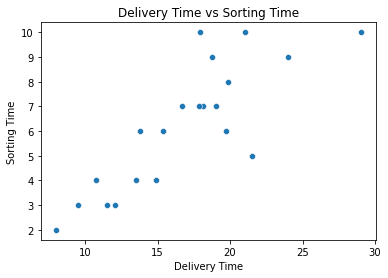

In [7]:
sns.scatterplot( x = 'Delivery Time' , y = 'Sorting Time' , data = delivery_data)
plt.title('Delivery Time vs Sorting Time')
plt.show()

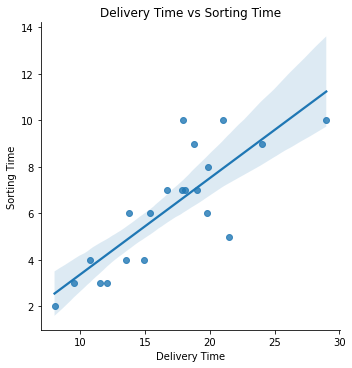

In [8]:
sns.lmplot( x = 'Delivery Time' , y = 'Sorting Time' , data = delivery_data)
plt.title('Delivery Time vs Sorting Time')
plt.show()

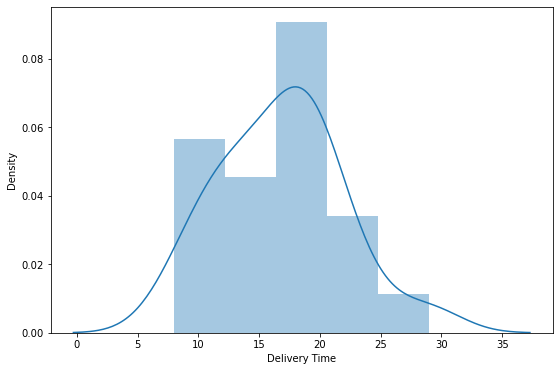

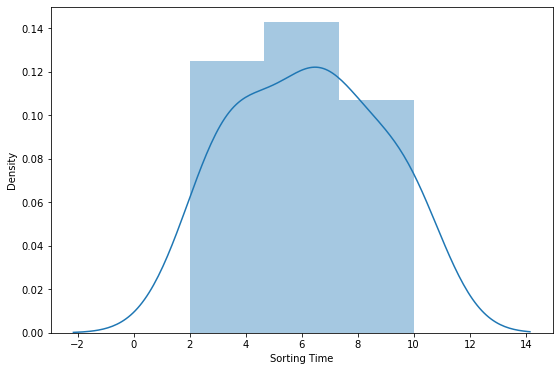

In [9]:
plt.figure(figsize=(9,6))
labels = ['Delivery Time' , 'Sorting Time']
sns.distplot(delivery_data['Delivery Time'])
plt.show()
plt.figure(figsize=(9,6))
sns.distplot( delivery_data['Sorting Time'])
plt.show()

In [10]:
delivery_data['Delivery Time'].skew()

0.3523900822831107

In [11]:
delivery_data['Sorting Time'].skew()

0.047115474210530174

It is following linearity

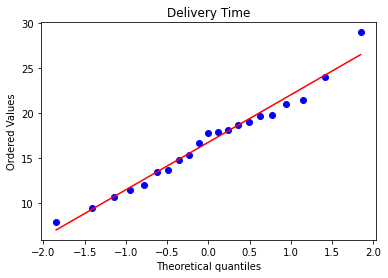

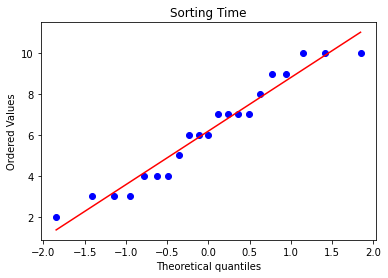

In [12]:
stats.probplot(x = delivery_data['Delivery Time'] , dist = 'norm' , plot = plt)
plt.title('Delivery Time')
plt.show()
stats.probplot(x = delivery_data['Sorting Time'] ,dist = 'norm' , plot = plt)
plt.title('Sorting Time')
plt.show()

In [13]:
delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


The correlation between Delivery time and sorting time is greater than 0.8

In [32]:
x = delivery_data.drop(labels='Delivery Time' , axis =1)
y = delivery_data[['Delivery Time']]

In [33]:
delivery_data1 = smf.ols(formula='y ~ x' , data = delivery_data).fit()

In [34]:
pred_deliverytime = delivery_data1.predict(x)

In [35]:
pred_deliverytime

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [36]:
delivery_data['pred_deliverytime']=pred_deliverytime

In [37]:
delivery_data

,Delivery Time,Sorting Time,pred_deliverytime
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


# Log transformation

In [38]:
log_deliverytime = np.log(delivery_data['Sorting Time'])
log_deliverytime

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: Sorting Time, dtype: float64

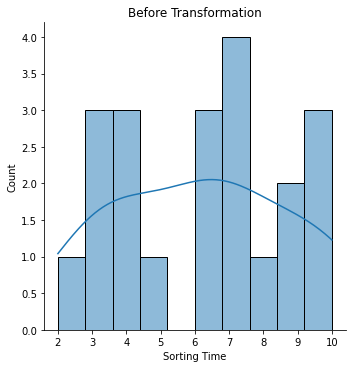

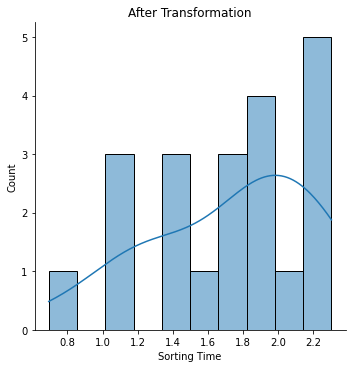

In [39]:
sns.displot(delivery_data['Sorting Time'],bins = 10,kde= True)
plt.title('Before Transformation')
sns.displot(log_deliverytime,bins = 10,kde= True)
plt.title('After Transformation')
plt.show() 

In [57]:
log_deliverytime1 = smf.ols(formula='y ~ log_deliverytime' , data = delivery_data).fit()

In [58]:
log_deliverytime1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        17:12:51   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_deliverytime     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation

In [70]:
sqrt_deliverytime = np.sqrt(delivery_data['Sorting Time'])
sqrt_deliverytime

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: Sorting Time, dtype: float64

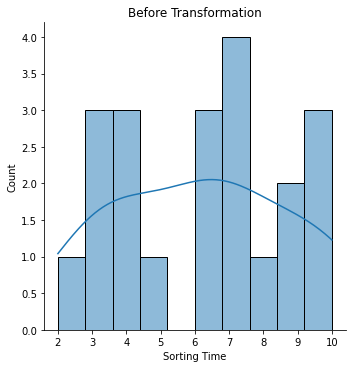

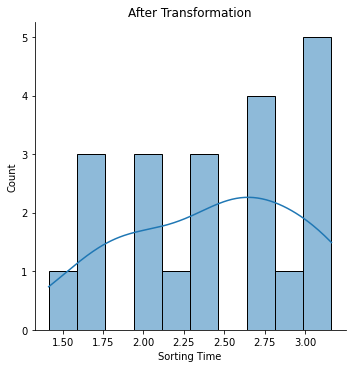

In [71]:
sns.displot(delivery_data['Sorting Time'],bins = 10,kde= True)
plt.title('Before Transformation')
sns.displot(sqrt_deliverytime,bins = 10,kde= True)
plt.title('After Transformation')
plt.show()

In [72]:
square_deliverytime = smf.ols(formula='y ~ sqrt_deliverytime' , data = delivery_data).fit()

In [73]:
square_deliverytime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.61e-06
Time:                        17:18:40   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_deliverytime     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cube Root Transformation

In [74]:
cbrt_deliverytime = np.cbrt(delivery_data['Sorting Time'])
cbrt_deliverytime

0     2.154435
1     1.587401
2     1.817121
3     2.080084
4     2.154435
5     1.817121
6     1.912931
7     1.442250
8     2.154435
9     2.080084
10    2.000000
11    1.587401
12    1.912931
13    1.442250
14    1.442250
15    1.587401
16    1.817121
17    1.912931
18    1.259921
19    1.912931
20    1.709976
Name: Sorting Time, dtype: float64

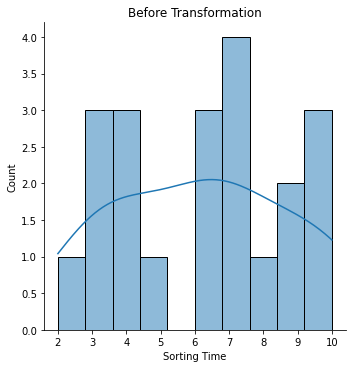

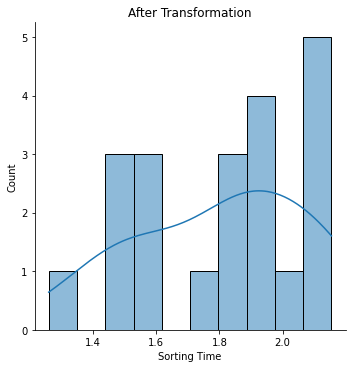

In [75]:
sns.displot(delivery_data['Sorting Time'],bins = 10,kde= True)
plt.title('Before Transformation')
sns.displot(cbrt_deliverytime,bins = 10,kde= True)
plt.title('After Transformation')
plt.show()

In [78]:
cube_deliverytime = smf.ols(formula='y ~ cbrt_deliverytime' , data = delivery_data).fit()

In [79]:
cube_deliverytime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.48e-06
Time:                        17:19:20   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.5792      4.332     -2.673      0.015     -20.647      -2.511
cbrt_deliverytime    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""